In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
df=pd.read_csv('database/udemy.csv')

In [137]:
# show columns of the dataframe
df.columns

Index(['Unnamed: 0', 'course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject',
       'clean_course_title'],
      dtype='object')

In [138]:
# show info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           3683 non-null   int64 
 1   course_id            3683 non-null   int64 
 2   course_title         3683 non-null   object
 3   url                  3683 non-null   object
 4   is_paid              3683 non-null   object
 5   price                3683 non-null   object
 6   num_subscribers      3683 non-null   int64 
 7   num_reviews          3683 non-null   int64 
 8   num_lectures         3683 non-null   int64 
 9   level                3683 non-null   object
 10  content_duration     3683 non-null   object
 11  published_timestamp  3683 non-null   object
 12  subject              3683 non-null   object
 13  clean_course_title   3663 non-null   object
dtypes: int64(5), object(9)
memory usage: 403.0+ KB


In [139]:
# detect missing values
df.isnull().sum()

Unnamed: 0              0
course_id               0
course_title            0
url                     0
is_paid                 0
price                   0
num_subscribers         0
num_reviews             0
num_lectures            0
level                   0
content_duration        0
published_timestamp     0
subject                 0
clean_course_title     20
dtype: int64

In [140]:
# to make process more efficient, we can make question of each column that we want to analyze
# for example, we want to analyze the average of the price of the courses
# we can ask the question: what is the average price of the courses?
# and then we can answer the question by using the code below
# we can also ask the question: what is the maximum price of the courses?
# and then we can answer the question by using the code below
# and so on
# this method is more efficient than just randomly analyze the data

### Subject Column

In [141]:
# subject
df['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [142]:
len(df['subject'].unique())

4

In [143]:
df['subject'].value_counts()

subject
Web Development        1200
Business Finance       1199
Musical Instruments     681
Graphic Design          603
Name: count, dtype: int64

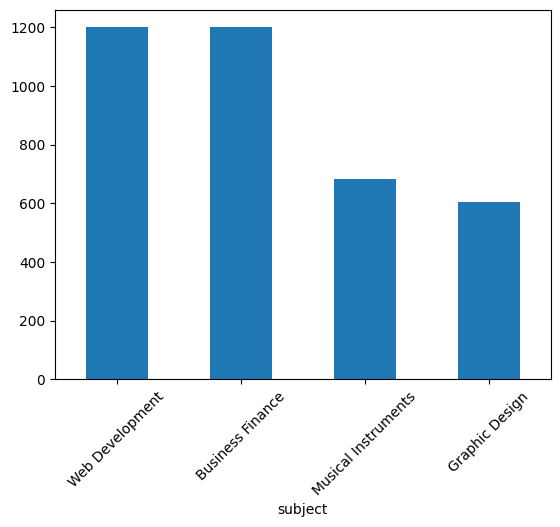

<Figure size 800x800 with 0 Axes>

In [144]:
df['subject'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.figure(figsize=(8,8))
plt.show()

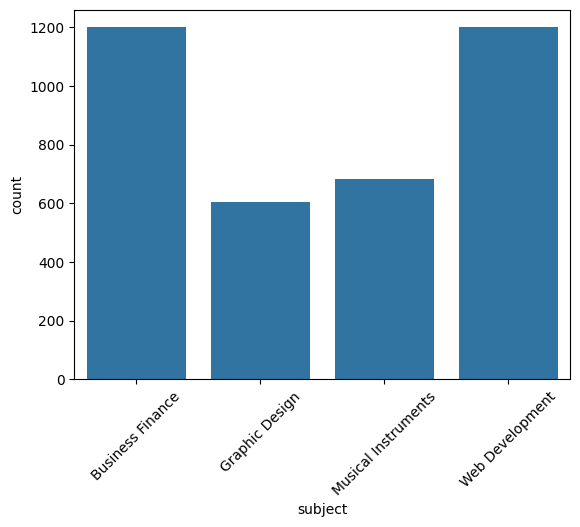

<Figure size 800x800 with 0 Axes>

In [145]:
sns.countplot(data=df, x=df['subject'])
plt.xticks(rotation=45)
plt.figure(figsize=(8,8))
plt.show()

### Subscribers  

In [146]:
df.groupby('subject')['num_subscribers'].sum()

subject
Business Finance       1870747
Graphic Design         1063148
Musical Instruments     846719
Web Development        7980572
Name: num_subscribers, dtype: int64

In [147]:
df['num_subscribers'].mean()

np.float64(3193.3711648112953)

In [148]:
df['num_subscribers'].max()

np.int64(268923)

In [149]:
df['num_subscribers'].min()

np.int64(0)

In [150]:
df['num_subscribers'].sum()

np.int64(11761186)

In [151]:
df.groupby('subject')['num_subscribers'].idxmax()

subject
Business Finance        494
Graphic Design         1465
Musical Instruments    1900
Web Development        2832
Name: num_subscribers, dtype: int64

In [152]:
df.loc[2832]

Unnamed: 0                                                          2832
course_id                                                          41295
course_title                        Learn HTML5 Programming From Scratch
url                    https://www.udemy.com/learn-html5-programming-...
is_paid                                                            False
price                                                               Free
num_subscribers                                                   268923
num_reviews                                                         8629
num_lectures                                                          45
level                                                         All Levels
content_duration                                              10.5 hours
published_timestamp                                 2013-02-14T07:03:41Z
subject                                                  Web Development
clean_course_title                       Learn HTML

### Levels

In [153]:
df['level'].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level', '52'], dtype=object)

In [154]:
## faulty data
f=(df['level']=='52')
## drop faulty data
df.drop(df[f].index, inplace=True)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'All Levels'),
  Text(1, 0, 'Beginner Level'),
  Text(2, 0, 'Intermediate Level'),
  Text(3, 0, 'Expert Level')])

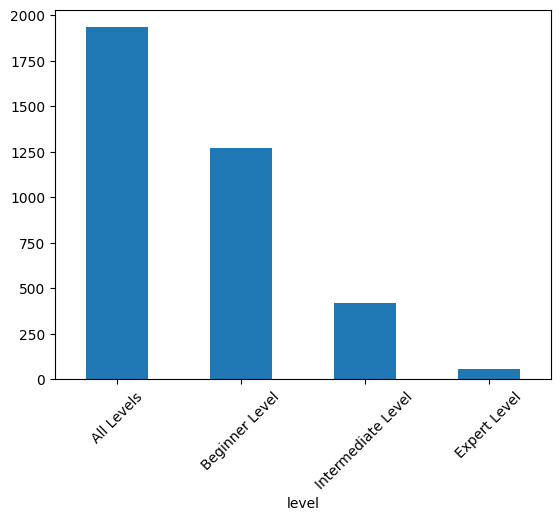

In [155]:
df['level'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)

In [156]:
df[['level','num_subscribers']]

,level,num_subscribers
0,All Levels,2147
1,All Levels,2792
2,Intermediate Level,2174
3,All Levels,2451
4,Intermediate Level,1276
...,...,...
3678,All Levels,1040
3679,Beginner Level,306
3680,All Levels,513
3681,All Levels,300


In [157]:
df.groupby('level')['num_subscribers'].sum()

level
All Levels            6916112
Beginner Level        4052843
Expert Level            50196
Intermediate Level     742005
Name: num_subscribers, dtype: int64

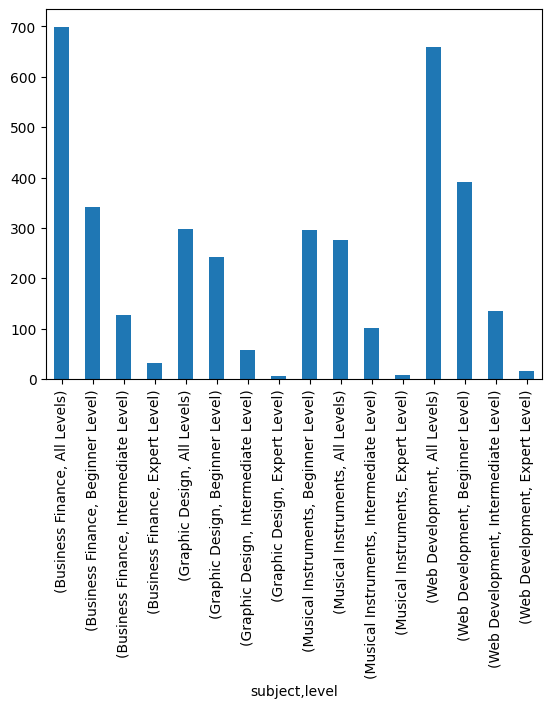

In [158]:
df.groupby('subject')['level'].value_counts().plot(kind='bar')
plt.show()

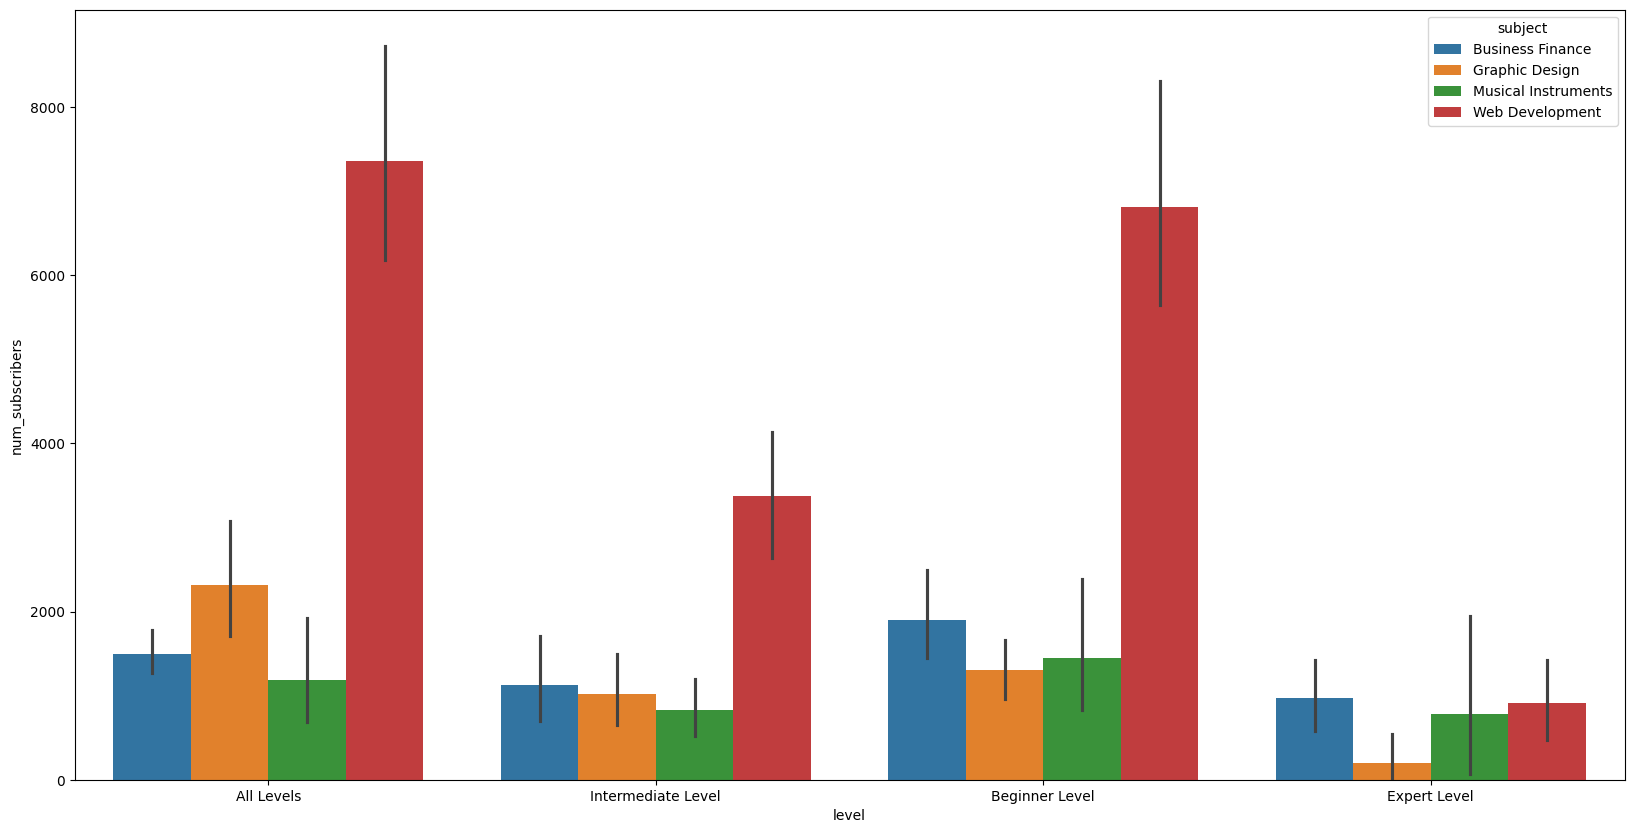

In [159]:
plt.figure(figsize=(20,10))
sns.barplot(data=df, x='level', y='num_subscribers', hue='subject')
plt.show()

### Lectures

In [160]:
def plot_draw(y):
    plt.figure(figsize=(20,10))
    sns.barplot(data=df, x='level', y=y, hue='subject')
    plt.title('Average '+y+' based on level and subject')
    plt.show()

    plt.figure(figsize=(5,5))
    df.groupby('level')[y].sum().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Total '+y+' based on level')
    plt.show()

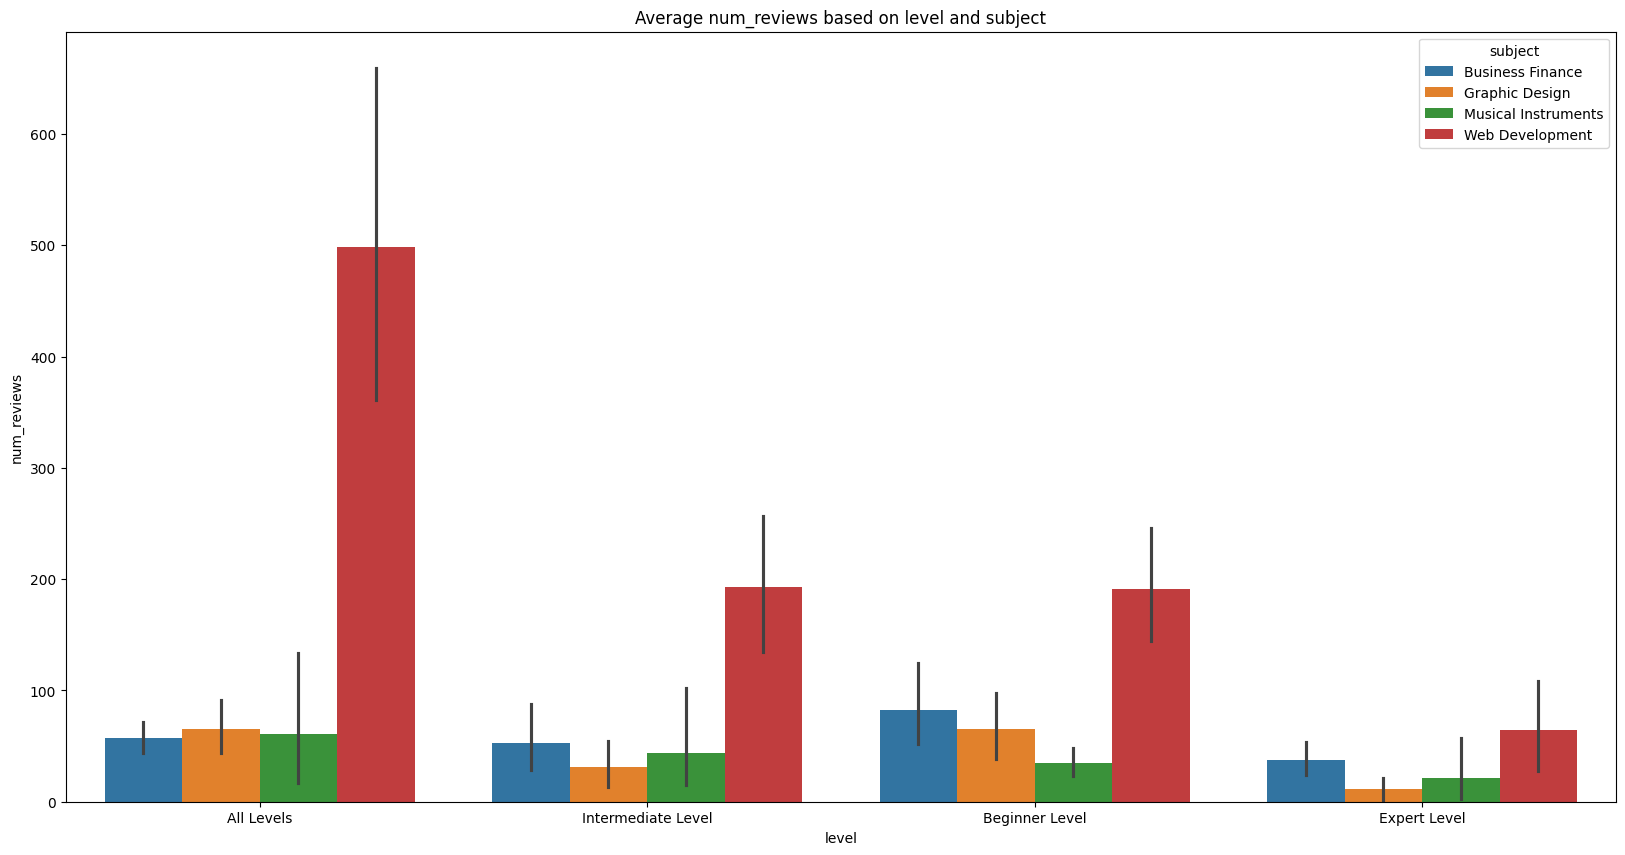

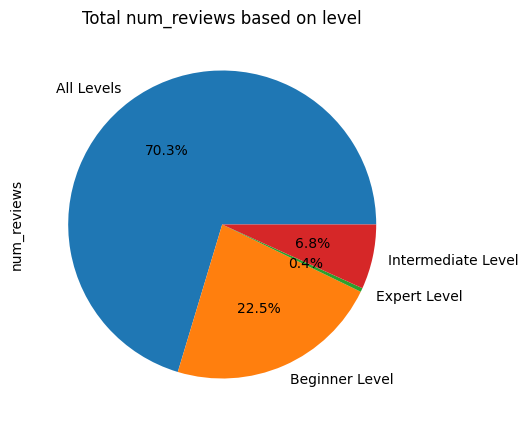

In [161]:
## number of reviews
plot_draw('num_reviews')

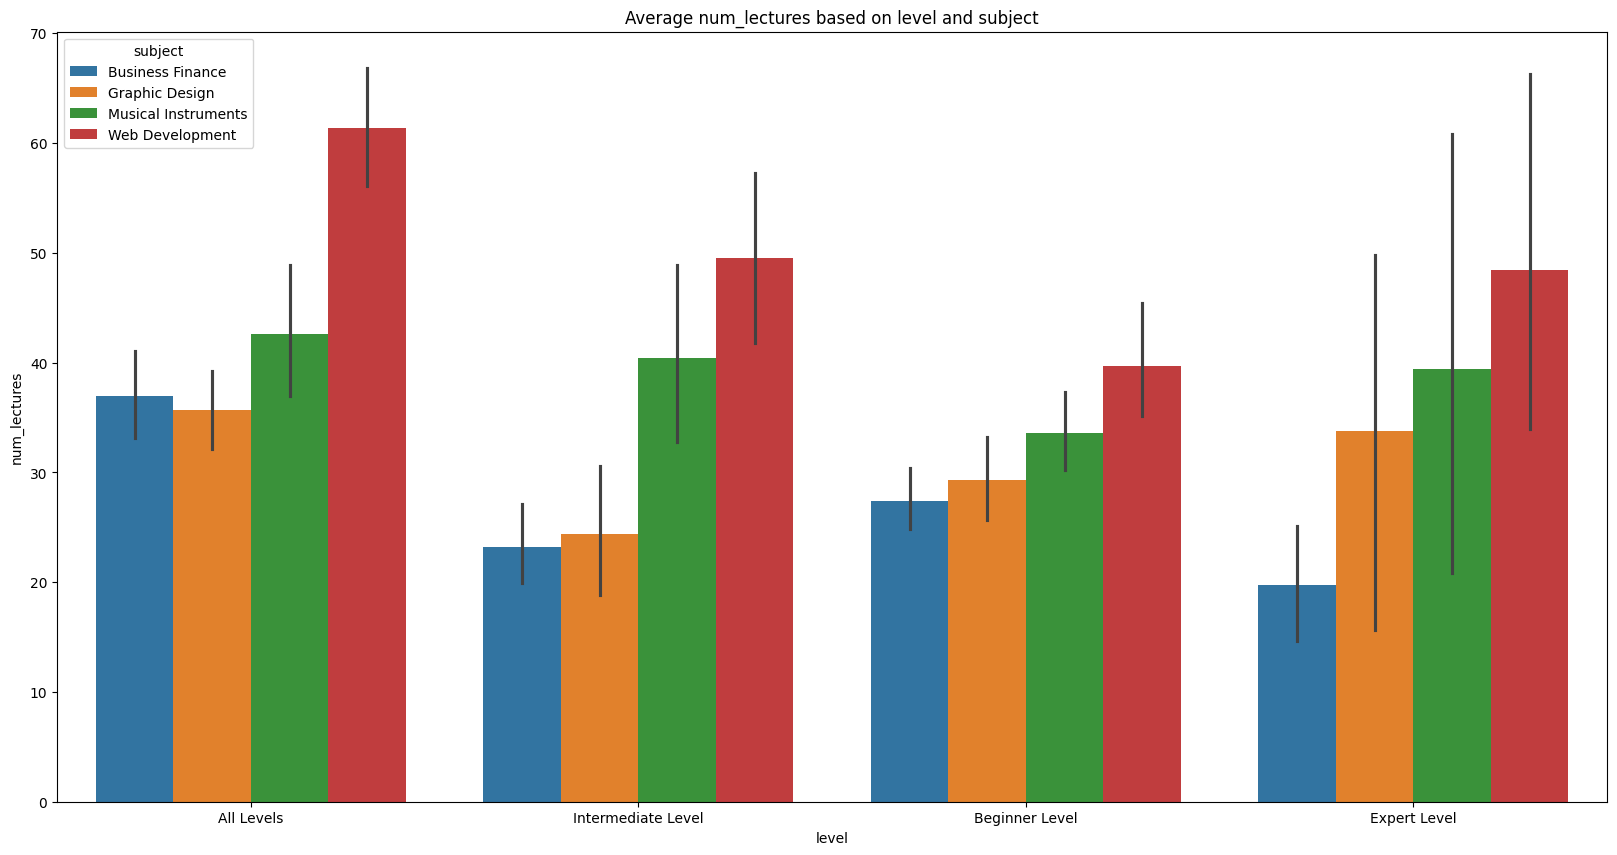

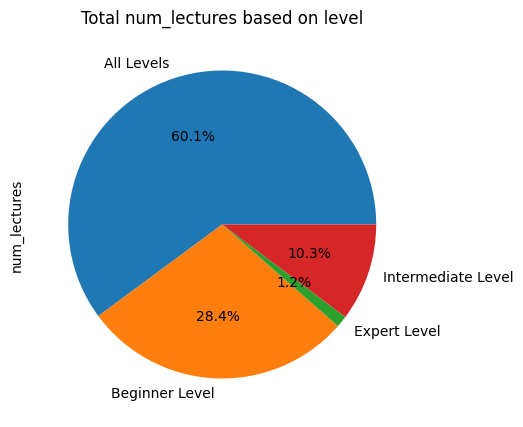

In [162]:
plot_draw('num_lectures')

### Price

In [163]:
df['price'].dtype

dtype('O')

In [164]:
df['price'].unique()

array(['200', '75', '45', '95', '150', '65', '195', '30', '20', '50',
       '175', '140', '115', '190', '125', '60', '145', '105', '155',
       '185', '180', '120', '25', '160', '40', 'Free', '100', '90', '35',
       '80', '70', '55', '165', '130', '85', '170', '110', '135'],
      dtype=object)

In [165]:
df['price']=df['price'].str.replace('Free','0').astype(float)

In [166]:
df['price'].mean()

np.float64(66.01032047800109)

In [167]:
df['price'].max()
df['price'].min()
df['price'].sum()

np.float64(243050.0)

In [169]:
df.iloc[df['price'].idxmax()]

Unnamed: 0                                                             0
course_id                                                        1070968
course_title                          Ultimate Investment Banking Course
url                    https://www.udemy.com/ultimate-investment-bank...
is_paid                                                             True
price                                                              200.0
num_subscribers                                                     2147
num_reviews                                                           23
num_lectures                                                          51
level                                                         All Levels
content_duration                                               1.5 hours
published_timestamp                                 2017-01-18T20:58:58Z
subject                                                 Business Finance
clean_course_title                    Ultimate Inve

In [172]:
df['profit']=df['price']*df['num_subscribers']
df.iloc[df['profit'].idxmax()]


Unnamed: 0                                                   3236
course_id                                                  164554
course_title                  AngularJS JumpStart with Dan Wahlin
url                    https://www.udemy.com/angularjs-jumpstart/
is_paid                                                      True
price                                                        75.0
num_subscribers                                             17802
num_reviews                                                  2144
num_lectures                                                  113
level                                                  All Levels
content_duration                                         10 hours
published_timestamp                          2014-03-24T17:31:15Z
subject                                           Web Development
clean_course_title                 AngularJS JumpStart Dan Wahlin
profit                                                  1335150.0
Name: 3236